__Data Source__ : https://catalog.data.gov/dataset/fatal-crashes

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [40]:
cols = [
    "objectid",
    "year",
    "district",
    "date_",
    "primary_st",
    "age",
    "sex",
    "crash_type",
    "hit_____ru",
    "veh1",
    "veh2",
    "arrest_yes",
    "investigat",
    "time_of_day__24hrs_",
    "lat",
    "lng",
]

In [41]:
df = pd.read_csv("./fatal_crashes.csv", usecols=cols)
column_mapping = {
    "objectid": "crash_id",
    "district": "police_district",
    "date_": "crash_date",
    "primary_st": "primary_street",
    "sex": "victim_gender",
    "crash_type": "collision_type",
    "hit_____ru": "hit_and_run",
    "veh1": "primary_vehicle",
    "veh2": "secondary_vehicle",
    "arrest_yes": "arrest_made",
    "investigat": "investigation_status",
    "time_of_day__24hrs_": "time",
    "lat": "latitude",
    "lng": "longitude",
}

df = df.rename(columns=column_mapping)

In [42]:
df.sample(3)

,crash_id,year,police_district,crash_date,primary_street,age,victim_gender,collision_type,hit_and_run,primary_vehicle,secondary_vehicle,arrest_made,investigation_status,time,latitude,longitude
0,47914,2019,3,2019-01-02 05:00:00+00,Packer Ave.,36.0,M,"Unit #1, high speed W/B on Packer Ave. crossed...",No,Auto,Auto,Yes,"Operator of veh #1 arrested. Charges Murder, H...",NaN,39.908598,-75.159152
365,48279,2021,18,2021-11-24 05:00:00+00,45th St.,44.0,F,Both unit #1 and #2 entered the intersection a...,No,Auto,Auto,Pending,Under Investigation.,NaN,39.956770,-75.211359
779,48690,2025,12,2025-02-27 05:00:00+00,S. 86th St.,57.0,M,Unit #1 was traveling werst on Mario Lanza Blv...,No,Auto,Fixed Object,No,The deceased was the cause of the crash.,15:47:00,39.890303,-75.246660


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   crash_id              796 non-null    int64  
 1   year                  796 non-null    int64  
 2   police_district       796 non-null    int64  
 3   crash_date            796 non-null    object 
 4   primary_street        796 non-null    object 
 5   age                   791 non-null    float64
 6   victim_gender         795 non-null    object 
 7   collision_type        796 non-null    object 
 8   hit_and_run           796 non-null    object 
 9   primary_vehicle       796 non-null    object 
 10  secondary_vehicle     793 non-null    object 
 11  arrest_made           780 non-null    object 
 12  investigation_status  792 non-null    object 
 13  time                  291 non-null    object 
 14  latitude              782 non-null    float64
 15  longitude             7

In [44]:
df.isnull().sum()

crash_id                  0
year                      0
police_district           0
crash_date                0
primary_street            0
age                       5
victim_gender             1
collision_type            0
hit_and_run               0
primary_vehicle           0
secondary_vehicle         3
arrest_made              16
investigation_status      4
time                    505
latitude                 14
longitude                14
dtype: int64

In [45]:
df.describe()

,crash_id,year,police_district,age,latitude,longitude
count,796.000000,796.000000,796.000000,791.000000,782.000000,782.000000
mean,48311.500000,2021.708543,18.410804,43.342604,40.011418,-75.156395
std,229.929699,1.746292,10.887109,18.776303,0.145467,0.338102
min,47914.000000,2019.000000,1.000000,0.000000,39.884438,-80.502372
25%,48112.750000,2020.000000,9.000000,29.000000,39.974932,-75.179845
50%,48311.500000,2022.000000,17.000000,40.000000,40.005547,-75.144203
75%,48510.250000,2023.000000,25.000000,58.000000,40.033044,-75.097381
max,48709.000000,2025.000000,77.000000,99.000000,42.224336,-74.961302


In [46]:
df["crash_date"] = df["crash_date"].str.split().str[0]
df["crash_date"] = pd.to_datetime(df["crash_date"])
df.sample(3)

,crash_id,year,police_district,crash_date,primary_street,age,victim_gender,collision_type,hit_and_run,primary_vehicle,secondary_vehicle,arrest_made,investigation_status,time,latitude,longitude
714,48625,2024,35,2024-09-01,5th St.,35.0,F,Unit #1 assaulted Unit #2 causing Unit #2 to f...,Yes,Auto,Pedestrian,No,Active investigation,22:25:00,40.031876,-75.131510
10,47924,2019,39,2019-01-27,Henry Ave.,27.0,M,"Single vehicle crash, high speed, winding road...",No,Auto,Fixed Object,No,No Charges,NaN,40.019048,-75.190333
341,48255,2021,16,2021-10-10,Lancaster Ave.,30.0,M,"Unit #1, SEPTA trolley car N/B on Lancaster Av...",No,Auto,Trolley car,Pending,Under Investigation.,NaN,39.959674,-75.195741


In [47]:
df.insert(
    loc=df.columns.get_loc("crash_date") + 1,
    column="day_name",
    value=df["crash_date"].dt.day_name(),
)

In [48]:
df.dtypes

crash_id                         int64
year                             int64
police_district                  int64
crash_date              datetime64[ns]
day_name                        object
primary_street                  object
age                            float64
victim_gender                   object
collision_type                  object
hit_and_run                     object
primary_vehicle                 object
secondary_vehicle               object
arrest_made                     object
investigation_status            object
time                            object
latitude                       float64
longitude                      float64
dtype: object

In [49]:
dtypes_dict = {
    "crash_id": "int64",
    "year": "int64",
    "police_district": "int64",
    "crash_date": "datetime64[ns]",
    "day_name": "object",
    "primary_street": "object",
    "age": "float64",
    "victim_gender": "object",
    "collision_type": "object",
    "hit_and_run": "object",
    "primary_vehicle": "object",
    "secondary_vehicle": "object",
    "arrest_made": "object",
    "investigation_status": "object",
    "time": "object",
    "latitude": "float64",
    "longitude": "float64",
}

In [50]:
df = df.astype(dtypes_dict)

In [51]:
df["hit_and_run"].unique()

array(['No', 'Yes', 'Unk', '??'], dtype=object)

In [52]:
df["hit_and_run"] = np.where(
    df["hit_and_run"] == "Yes", 1, np.where(df["hit_and_run"] == "No", 0, np.nan)
)

In [53]:
df["hit_and_run"].unique()

array([ 0.,  1., nan])

In [54]:
df["arrest_made"].value_counts()

arrest_made
No               549
Pending          147
Yes               73
No                 4
TBD                2
Pending ID         1
Unk.               1
Arrested           1
None expected      1
N                  1
Name: count, dtype: int64

In [55]:
df["year"].value_counts().rename("count").reset_index()

,year,count
0,2020,156
1,2024,134
2,2021,133
3,2023,128
4,2022,126
5,2019,90
6,2025,29


In [56]:
def plot_value_counts(
    df,
    count_column,
    title=None,
    xlabel=None,
    ylabel=None,
    color="steelblue",
    figsize=(10, 6),
):
    """
    Creates a bar plot showing value counts for a specified column.

    Parameters:
    - df: DataFrame containing the data
    - count_column: Column name to count values from
    - title: Plot title (defaults to 'Count by {column_name}')
    - xlabel: X-axis label (defaults to column_name)
    - ylabel: Y-axis label (defaults to 'Count')
    - color: Bar color (defaults to 'steelblue')
    - figsize: Figure size (defaults to (10, 6))
    """

    value_counts = df[count_column].value_counts().rename("count").reset_index()
    value_counts.columns = [count_column, "count"]

    if title is None:
        title = f"Count by {count_column}"
    if xlabel is None:
        xlabel = count_column.replace("_", " ").title()
    if ylabel is None:
        ylabel = "Count"

    plt.figure(figsize=figsize)
    bar_plot = sns.barplot(data=value_counts, x=count_column, y="count", color=color)

    plt.title(title, fontsize=14, pad=20)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)

    if any(len(str(x)) > 5 for x in value_counts[count_column]):
        plt.xticks(rotation=45, ha="right")

    for p in bar_plot.patches:
        bar_plot.annotate(
            format(p.get_height(), ".0f"),
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 5),
            textcoords="offset points",
            fontsize=10,
        )

    plt.tight_layout()
    plt.show()

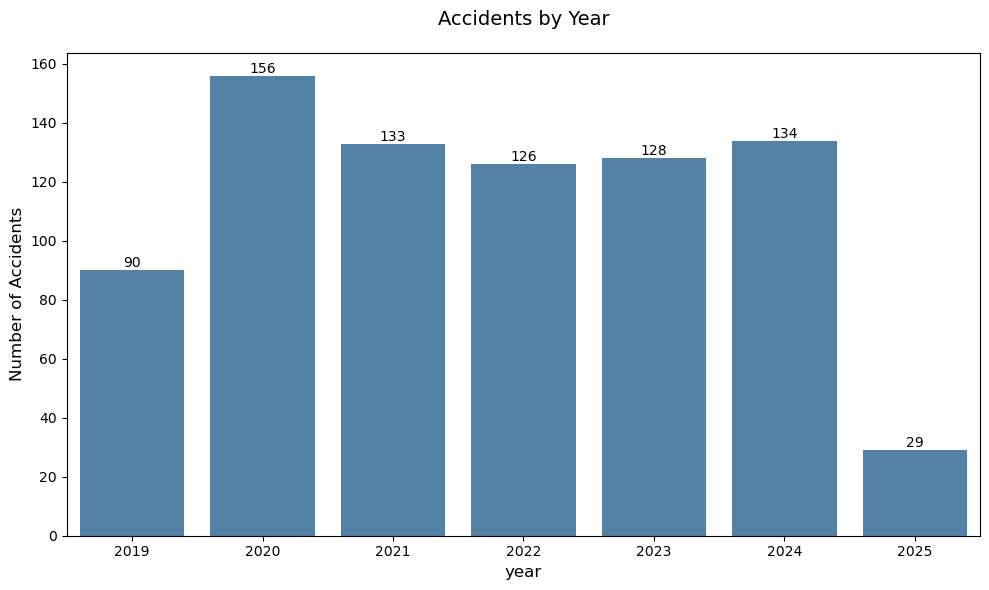

In [57]:
plot_value_counts(df, "year", "Accidents by Year", "year", "Number of Accidents")

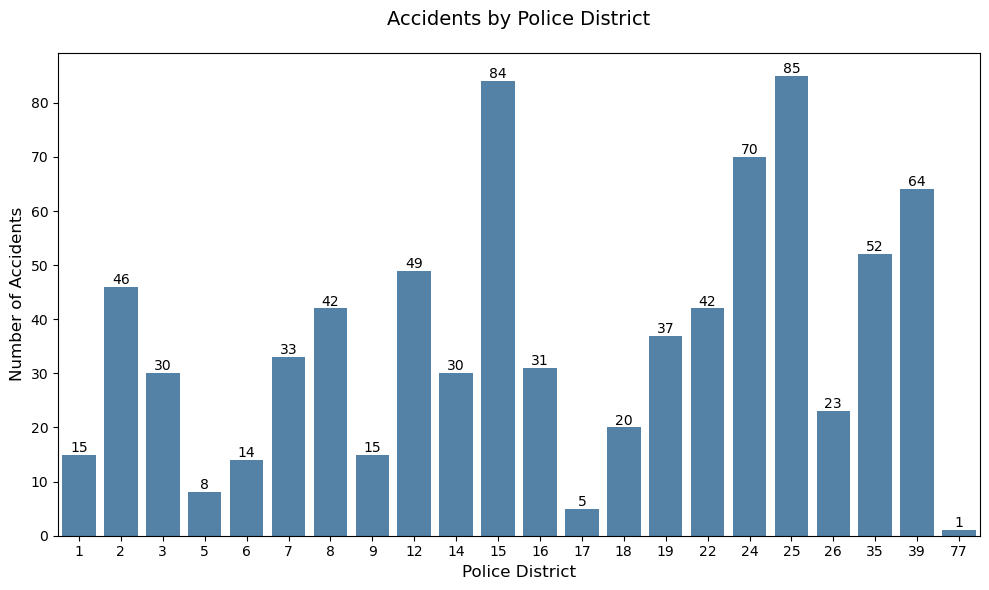

In [58]:
plot_value_counts(
    df,
    "police_district",
    "Accidents by Police District",
    "Police District",
    "Number of Accidents",
)

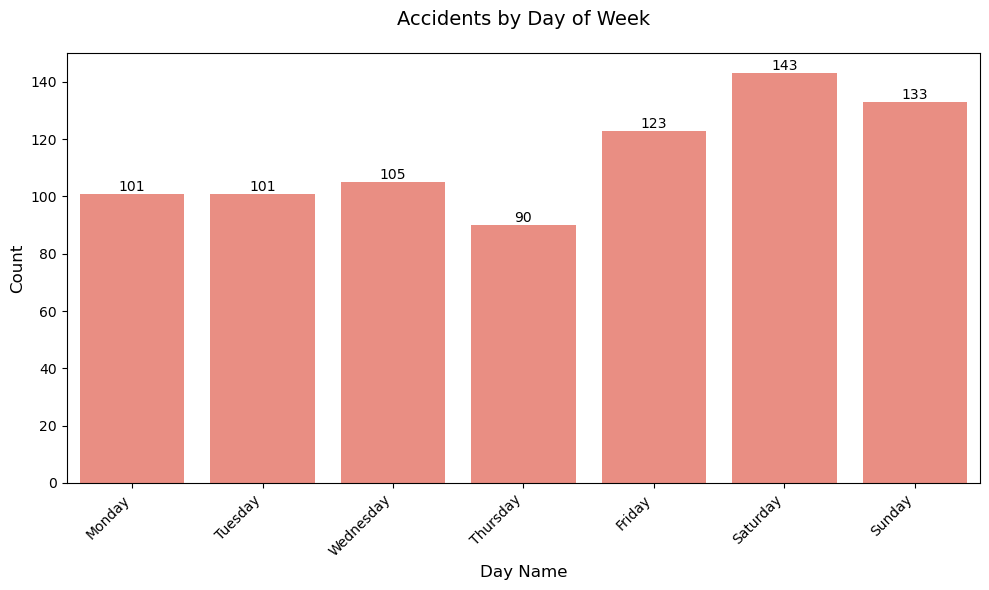

In [59]:
day_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
df["day_name"] = pd.Categorical(df["day_name"], categories=day_order, ordered=True)

plot_value_counts(df, "day_name", title="Accidents by Day of Week", color="salmon")

In [60]:
gender_mapping = {
    "M": "M",
    "F": "F",
    "MN": "M",
    "M.": "M",
    "Mn": "M",
    "f": "F",
}

df["victim_gender"] = df["victim_gender"].map(gender_mapping)
df["victim_gender"].value_counts()

victim_gender
M    580
F    215
Name: count, dtype: int64

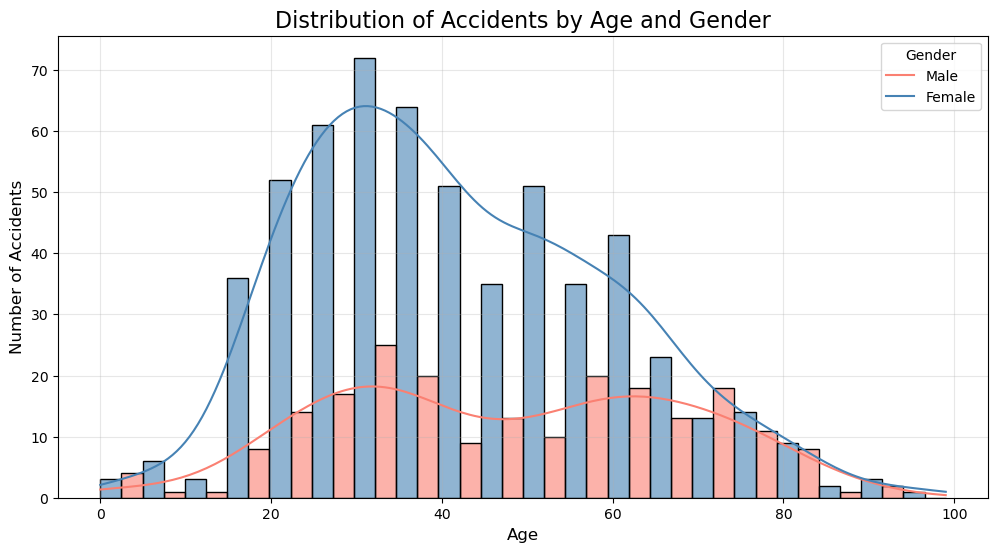

In [61]:
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x="age",
    hue="victim_gender",
    bins=20,
    kde=True,
    palette={"M": "steelblue", "F": "salmon"},
    alpha=0.6,
    multiple="dodge",
)

plt.title("Distribution of Accidents by Age and Gender", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.legend(title="Gender", labels=["Male", "Female"])
plt.grid(True, alpha=0.3)
plt.show()

In [62]:
df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 18, 25, 35, 45, 55, 65, 75, 100],
    labels=["0-18", "19-25", "26-35", "36-45", "46-55", "56-65", "66-75", "75+"],
)

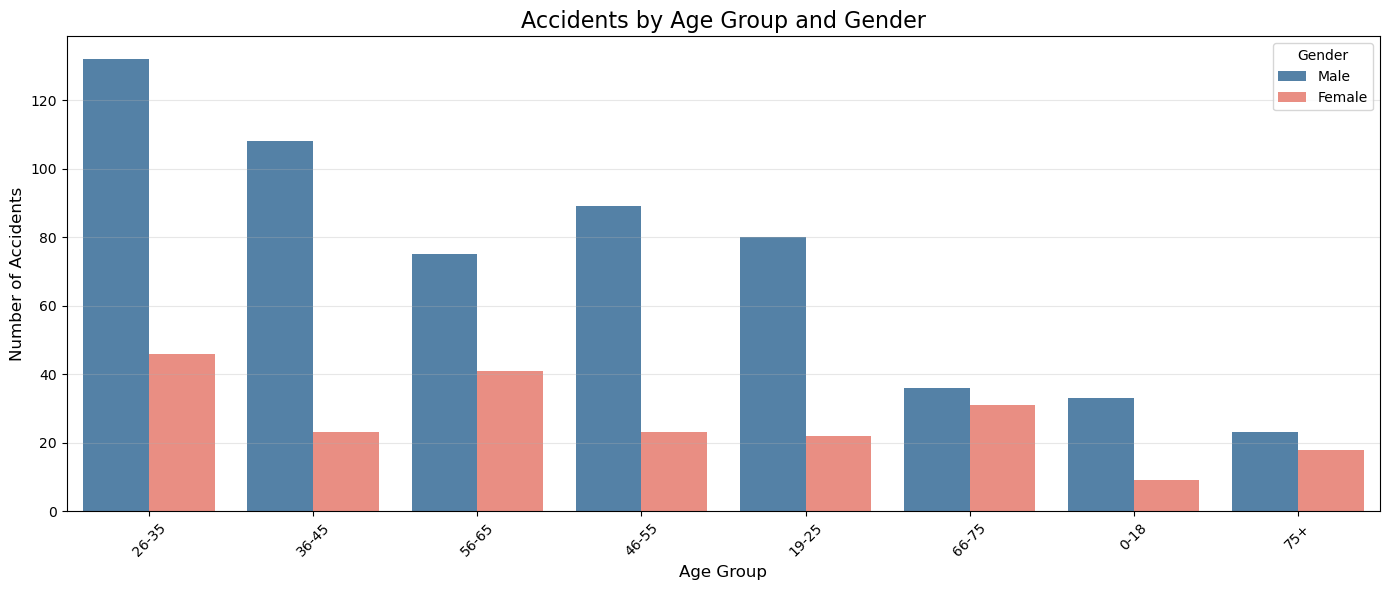

In [63]:
plt.figure(figsize=(14, 6))
sns.countplot(
    data=df,
    x="age_group",
    hue="victim_gender",
    palette={"M": "steelblue", "F": "salmon"},
    order=df["age_group"].value_counts().index,
)

plt.title("Accidents by Age Group and Gender", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.legend(title="Gender", labels=["Male", "Female"])
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis="y")
plt.tight_layout()
plt.show()

In [64]:
df["primary_vehicle"].value_counts()

primary_vehicle
Auto                  623
M/C                    78
Motorcycle             29
Auto                   10
Train                   9
Dirtbike                9
ATV                     4
Bus                     4
Bicyclist               2
Dirt Bike               2
SEPTA Bus               2
Motor Scooter           2
Quad                    2
Bike                    2
unk                     1
Van                     1
T/T                     1
Moped                   1
Septa bus               1
Truck                   1
Trolley Car             1
Auto (Police)           1
Ambulance               1
Tow truck               1
Can Am Slingshot        1
Pedestrian              1
PFD Ladder TK           1
SEPTA Trolley           1
SEPTA Subway Train      1
Tree                    1
School Bus              1
Auto (Mack TK)          1
Name: count, dtype: int64

In [65]:
vehicle_mapping = {
    "Dirt Bike": "Dirtbike",
    "SEPTA Bus": "Bus",
    "Septa bus": "Bus",
    "Motor Scooter": "Moped",
    "T/T": "Truck",
    "Auto (Police)": "Auto",
    "Auto (Mack TK)": "Auto",
    "SEPTA Trolley": "Trolley",
    "SEPTA Subway Train": "Train",
    "PFD Ladder TK": "Truck",
    "Can Am Slingshot": "ATV",
}
df["primary_vehicle"] = df["primary_vehicle"].replace(vehicle_mapping)

In [ ]:
vehicle_categories = {
    "M/C": "Motorcycle",
    "Auto": "Auto",
    "Motorcycle": "Motorcycle",
    "Dirtbike": "Motorcycle",
    "Bike": "Bicycle",
    "Bicyclist": "Bicycle",
    "Bus": "Commercial",
    "School Bus": "Commercial",
    "Truck": "Commercial",
    "Tow truck": "Commercial",
    "Ambulance": "Commercial",
    "Train": "Train",
    "Trolley": "Trolley",
    "ATV": "Off-road",
    "Quad": "Off-road",
    "Moped": "Motorcycle",
    "Van": "Auto",
    "Pedestrian": "Pedestrian",
    "Tree": "Object",
}

In [67]:
df["primary_vehicle"] = df["primary_vehicle"].map(vehicle_categories)


unmapped = df[df["primary_vehicle"].isna()]["primary_vehicle"].unique()
print(f"Unmapped values: {unmapped}")


df["primary_vehicle"] = df["primary_vehicle"].fillna("Others")

Unmapped values: [nan]


In [68]:
print(df["primary_vehicle"].value_counts())

primary_vehicle
Auto          626
Motorcycle    121
Commercial     13
Others         12
Train          10
Off-road        7
Bicycle         4
Pedestrian      1
Trolley         1
Object          1
Name: count, dtype: int64


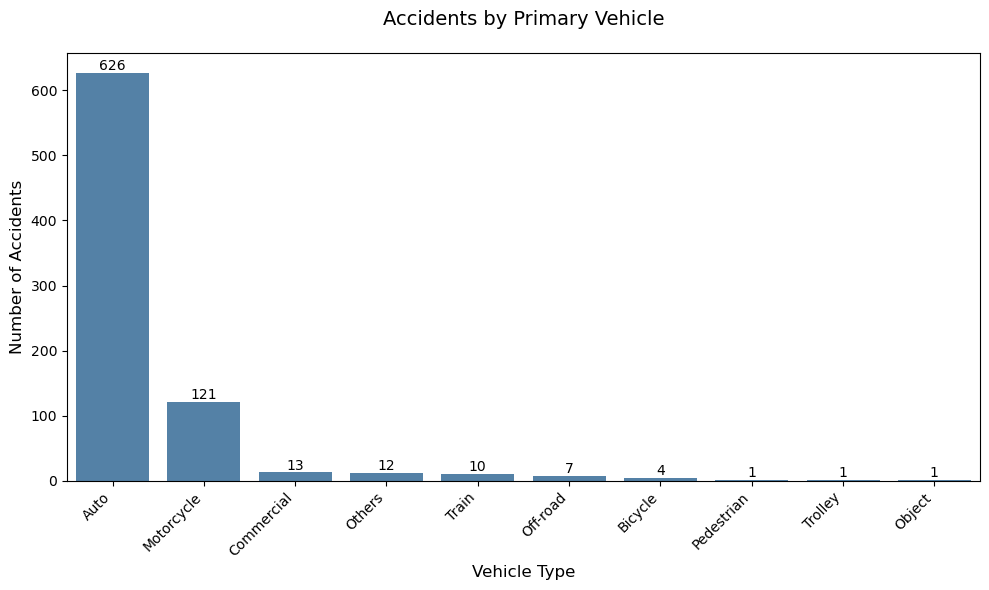

In [69]:
plot_value_counts(
    df,
    "primary_vehicle",
    "Accidents by Primary Vehicle",
    "Vehicle Type",
    "Number of Accidents",
)

In [ ]:
df["primary_vehicle"].value_counts()

primary_vehicle
Auto          626
Motorcycle    121
Commercial     13
Others         12
Train          10
Off-road        7
Bicycle         4
Pedestrian      1
Trolley         1
Object          1
Name: count, dtype: int64

In [ ]:
df["secondary_vehicle"].value_counts()

secondary_vehicle
Pedestrian               315
Auto                     234
Fixed Object             137
Bicycle                   17
Bicyclist                 10
M/C                        9
Parked veh.                8
Tree                       6
Scooter                    4
Parked                     4
Bus                        4
E-Scooter                  3
Ground                     3
Parked Trailer             3
Fixed object               3
Dirt-bike                  3
Motorcycle                 3
Tractor-Trailer            2
M/C and PED                2
Parked auto                2
Trolley car                2
Mini-bike                  2
Front-end loader           2
Auto (Parked)              2
Dirtbike                   1
Parked TT                  1
T/T                        1
School Bus                 1
Ped on skateboard          1
Parked autos               1
Pedestrian on scooter      1
ATV                        1
Truck                      1
E-Bicycle                

In [ ]:
standardization_map = {
    "Pedestrian on scooter": "Pedestrian",
    "Ped on skateboard": "Pedestrian",
    "Pedestrians": "Pedestrian",
    "Parked veh.": "Parked Vehicle",
    "Parked auto": "Parked Vehicle",
    "Parked autos": "Parked Vehicle",
    "Auto (Parked)": "Parked Vehicle",
    "Parked": "Parked Vehicle",
    "Parked TT": "Parked Vehicle",
    "T/T": "Truck",
    "Tractor-Trailer": "Truck",
    "Dirt-bike": "Dirtbike",
    "Mini-bike": "Dirtbike",
    "E-Scooter": "Scooter",
    "E-Bicycle": "Bicycle",
    "Bicyclist": "Bicycle",
    "Fixed object": "Fixed Object",
    "Trolley car": "Trolley",
    "M/C and PED": "Motorcycle + Pedestrian",
    "School Bus": "Bus",
    "Front-end loader": "Construction Equipment",
}

df["secondary_vehicle"] = df["secondary_vehicle"].replace(standardization_map)

In [ ]:
main_categories = {
    "Pedestrian": "Pedestrian",
    "Auto": "Auto",
    "Fixed Object": "Fixed Object",
    "Bicycle": "Bicycle",
    "M/C": "Motorcycle",
    "Parked Vehicle": "Parked Vehicle",
    "Bus": "Bus",
    "Dirtbike": "Motorcycle",
    "Scooter": "Motorcycle",
    "Motorcycle": "Motorcycle",
    "Truck": "Truck",
    "Trolley": "Trolley",
    "Ground": "Ground",
    "Parked Trailer": "Trailer",
    "ATV": "Off-road",
    "Moped": "Motorcycle",
    "Construction Equipment": "Commercial Vehicle",
    "Motorcycle + Pedestrian": "Mixed",
}
df["secondary_vehicle"] = df["secondary_vehicle"].map(main_categories)

In [ ]:
df["secondary_vehicle"].value_counts()

secondary_vehicle
Pedestrian            318
Auto                  234
Fixed Object          140
Bicycle                28
Motorcycle             26
Parked Vehicle         18
Bus                     5
Truck                   4
Ground                  3
Trailer                 3
Trolley                 2
Mixed                   2
Commercial Vehicle      2
Off-road                1
Name: count, dtype: int64

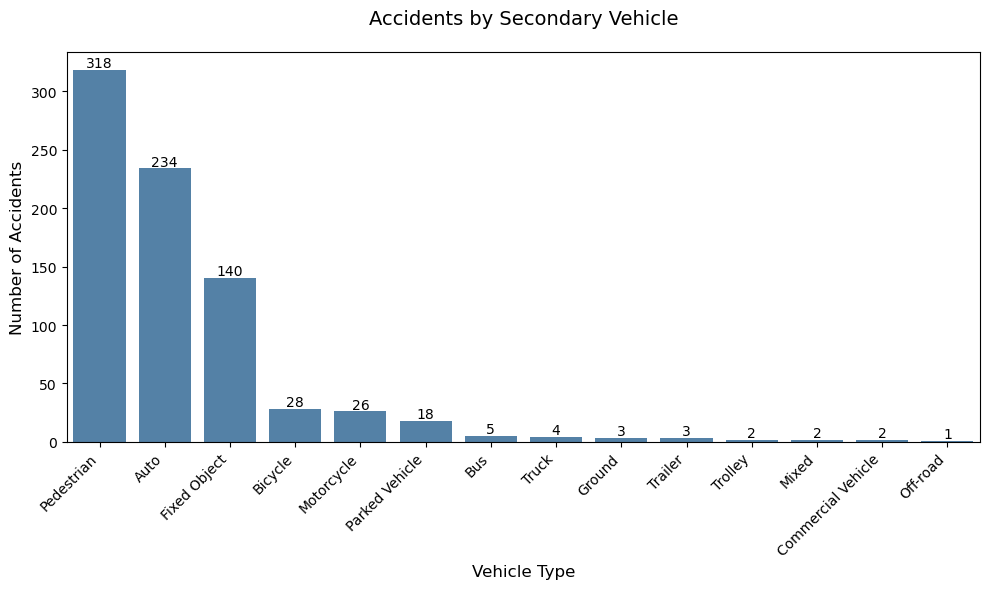

In [78]:
plot_value_counts(
    df,
    "secondary_vehicle",
    "Accidents by Secondary Vehicle",
    "Vehicle Type",
    "Number of Accidents",
)

In [71]:
df.to_csv("./philadelphia_fatal_crashes.csv")